By: Christian Amstrup Petersen.
Student number: 202104742
\appendix
\newcommand\m[1]{\begin{bmatrix}#1\end{bmatrix}} 

In [411]:
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib as mpl

# Variables to adjust grid size
gridWidth = 10
gridHeight = gridWidth*1.26

# Resuable functions and variables

# Plots the given x- and y-coordinates
def plot(x,y):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    plt.grid()
    ax.plot(x,y)

# Plots multiple figures in the same plot/grid. Used for comparisson between a modified, and non-modified figure. If 'withLabels' is set to true, will include labels on each plot.
# The parameter for this function should then be: (pointValuesList: [[x1, y1, label1], [x2, y2, label2], ... [x_n, y_n, label_n]], withLabels: True)
def plotMultiple(pointValuesList, withLabels = False):
    fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
    plt.grid()
    for values in pointValuesList:
        if withLabels:
            ax.plot(values[0], values[1], label=values[2])
        else:
            ax.plot(values[0], values[1])
    ax.legend()

\section{The signal function}
We're given the function for a signal, given by:

$$y(x) = 8cos(x)-3sin(7x), ~~ 0 \leq x \leq 9,$$
and told that this signal is sent through a cable, and therefore are affected by 'distortion'. Our goal for this assignment is to modify the signal in such a way, that this 'distortion' is minimized.

Firstly, we implement the function and plot the result over, through n-points, and in the interval specified for $x$:

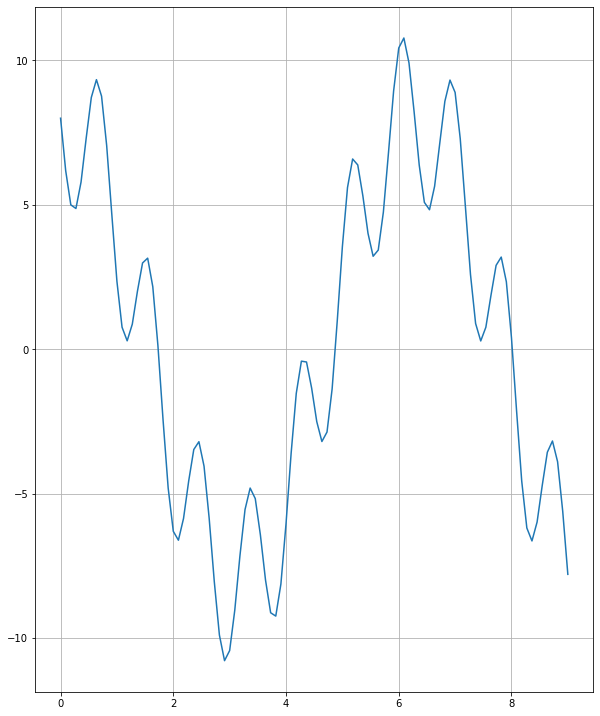

In [423]:
# The signal function provided for this assignment.
def signalFunction(x):
    return 8*np.cos(x)-3*np.sin(7*x)

# Transformation of the signalFunction, into a vectorized version, for easier use on a vector. 
# Given a vector, the function will apply the specified logic onto each point in the vector.
signalFunction_vectorized = np.vectorize(signalFunction)

# Plot 'point' size. 
# IMPORTANT(!): This variable will be referenced/used throughout this assignment, due to calculations requiring consistent sizes/shapes of vector and matrices.
n = 100

# Creates 'n'-amount of values, between the given interval
x = np.linspace(0, 9, n)

y = signalFunction_vectorized(x)

plot(x,y)

\section{Adding distortion}

In this part we're giving the following code, and asked to now add the 'distortion' to our previous calculated signal. The 'distortion' is given as randomized values from a normal-distributed function:

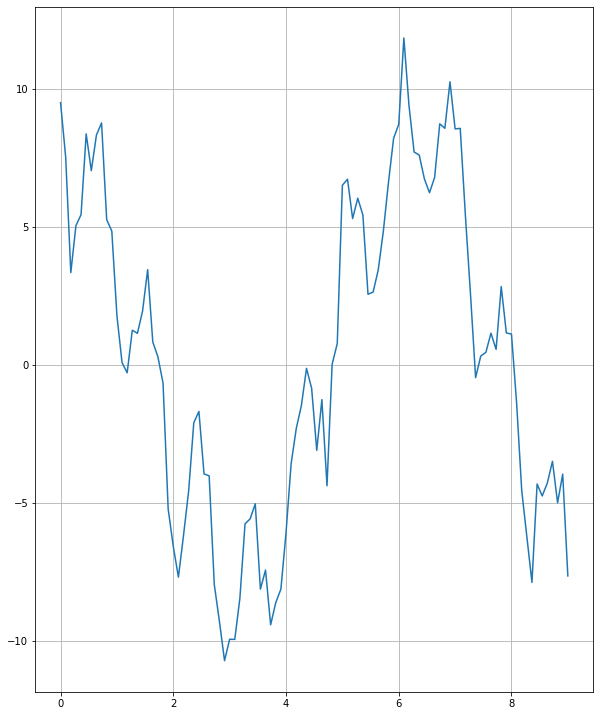

In [413]:
rng = np.random.default_rng()
støj = rng.standard_normal(n)

y_støj = y + rng.standard_normal(n)

plot(x,y_støj)

\section{The diagonal vector}

From the assignment, we're supplied with a recipe for a diagonal matrix, of shape $n\times n$. From this information, we can setup the following function, to build such a matrix, to our specifications:

In [414]:
# Question C

# A function that creates the matrix for this question. Default value, the value chosen if none is provided in the call of the function, is set to 1/3, as seen in the assignment.
# The parameter 'n' is used to define the amount of rows and columns in the matrix.
# The 'diagCount'-parameter specifies the amount of diagonal entries into the matrix. The amount given to the function describes the number of non-zero entries in the first and last row, aswell as the number in first and last column.
def createSpecifiedDiagMatrix(n, diagCount=2, value = 1/3):
    A = None
    for i in range(diagCount):
        v = np.full(n-i, value)
        a_new = np.diag(v, i)
        if i > 0:
            a_new2 = np.diag(v, -i)
            A += a_new2
            A += a_new
        else:
            A = a_new
    return A    

# Creating a diagMatrix, using the 'n'-variable from question A, and using the default values from the function.
A = createSpecifiedDiagMatrix(n)

print(f"Matrix A, of shape {A.shape}: \n", A)

Matrix A, of shape (100, 100): 
 [[0.33333333 0.33333333 0.         ... 0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333 ... 0.         0.         0.        ]
 [0.         0.33333333 0.33333333 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.33333333 0.33333333 0.        ]
 [0.         0.         0.         ... 0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         ... 0.         0.33333333 0.33333333]]


The matrix above is the product of adding together 3 matrices. The 'center' is created by setting the $offset=0$. The next two are created by created a vector in the length of $n-1$, with $offset=1$ for one, and $offset=-1$ for the other, then adding these together with the 'center. 

\section{The modification}
We now have our new $A$-matrix, and we like to see if this process yielded any positive results. For the sake of comparison, we have plotted the different y-values of our source $y$, the distorted $y_{støj}$, and our now modified $Ay_{støj}$. To make it clear, how much our 'modification' have helped clean up the signal, we have created the \texttt{absValues}-function. This function will give us a numeric result on the difference between 2 given vectors, on each point. The sum of this result will yield a 'score' with which we can compare the efficiency of processes, i.e. concluded whether or not $Ay_{støj}$, relieves the signal of some of the distortion. 

To understand why this product $Ay_{støj}$, is closer to our source, we have to look at the function for our signal:

$$y(x) = 8cos(x)-3sin(7x), ~~ 0 \leq x \leq 9$$

It consists of two parts, each forming a 'wave' due to the nature of sines, and cosines. If we look at our plot from question A, we can see a general structure from $8cos(x)$ providing the 'bigger' wave, with the $sin$-part creating smaller 'waves' on the line. Takes this equality:
$$Ay=\m{a && b && 0\\ c && d && e \\ 0 && h && i}\m{y_1 \\ y_2 \\ y_3} = \m{ay_1+by_2 \\ cy_1+dy_2+ey_3 \\ hy_2+iy_3}$$ 
After multiplying the matrix $A$ onto the vector, the result is a vector that 'smoothes' out the curves, due to it being dependant on the points adjacent to it. What the distortion-function introduces is randomness, and spikes, but because our original function never makes any greater 'leaps' from the point before it, we can remove these 'leaps' by including the nabouring values, back into a point, which should be fairly close the any given point.


36.281663257168205
34.55963190817953
Y and Ay_støj comparison sum: 63.822025196002805
Y and y_støj comparison sum: 78.93144329066774


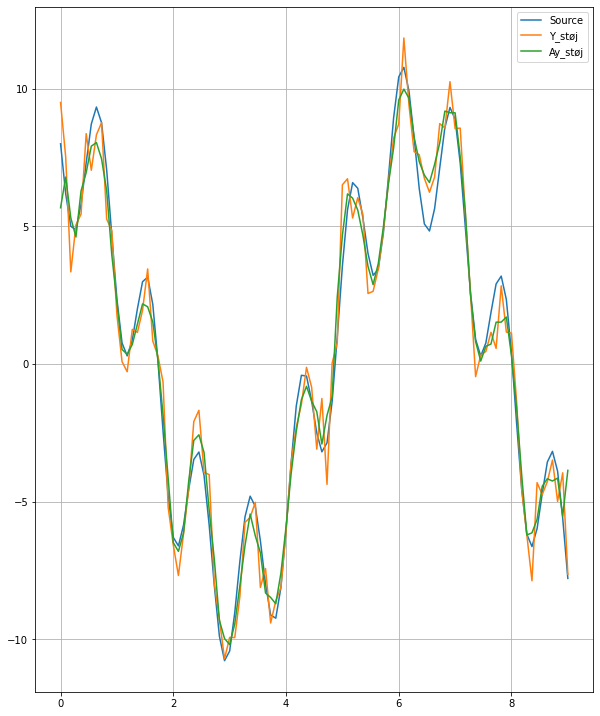

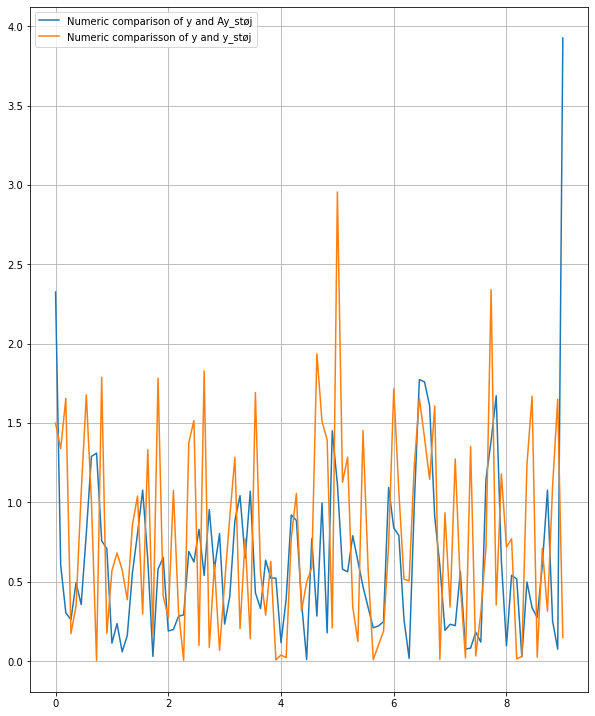

In [415]:
Ay_støj = A @ y_støj

# Plotting of our now 3 y-values. The 'True'-parameter specifies that labels should be included on the plot.
plotMultiple([[x,y, "Source"], [x, y_støj, "Y_støj"], [x, Ay_støj, "Ay_støj"]], True)

# Returns the absolute value of the two given values
def absValues(val1, val2):
    return abs(val1-val2)

# Transformation of the function, for use on entire vectors
absValues_vectorised = np.vectorize(absValues)

# Vectors of the absolute difference between the given vector, and our source 'y'.
y_Ay_comparison = absValues_vectorised(y, Ay_støj)
y_ystøj_comparison = absValues_vectorised(y, y_støj)

print(y.sum())
print(y_støj.sum())

# A visual representation of the difference between y and y_støj, and y and Ay_støj
plotMultiple([[x, y_Ay_comparison, "Numeric comparison of y and Ay_støj"], [x, y_ystøj_comparison, "Numeric comparisson of y and y_støj"]], withLabels=True)

print("Y and Ay_støj comparison sum:", y_Ay_comparison.sum())
print("Y and y_støj comparison sum:", y_ystøj_comparison.sum())

*I have too late realized that my method/solution for this problem may be suboptimal, and probably should be solved using examples from 'Notesæt 08', section 8.2, but was unable to make the proper changes, due to time contraints and personal misjudgement.

\section{Optimizing B}
We're now asked to provide a 'better' solution, than our $A$-matrix, by modifying our diagonal matrix, in a number of possible ways. This is sadly where we're introduced to a problem: Randomness. An optimal solution is dependant on what the 'nature' of the distortion is, meaning; If our $y_{støj}$ adds too much, without subtracting an equal amount, the optimal diagonal matrix will have to account for this, and will therefore have entries $< 1/3$, and vice verca. To calculate such a solution, we have set up the following function:

Former best score:  63.822025196002805
Optimal B with  62.572189895264
[[0.34234851 0.34234851 0.         ... 0.         0.         0.        ]
 [0.34234851 0.34234851 0.34234851 ... 0.         0.         0.        ]
 [0.         0.34234851 0.34234851 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.34234851 0.34234851 0.        ]
 [0.         0.         0.         ... 0.34234851 0.34234851 0.34234851]
 [0.         0.         0.         ... 0.         0.34234851 0.34234851]]


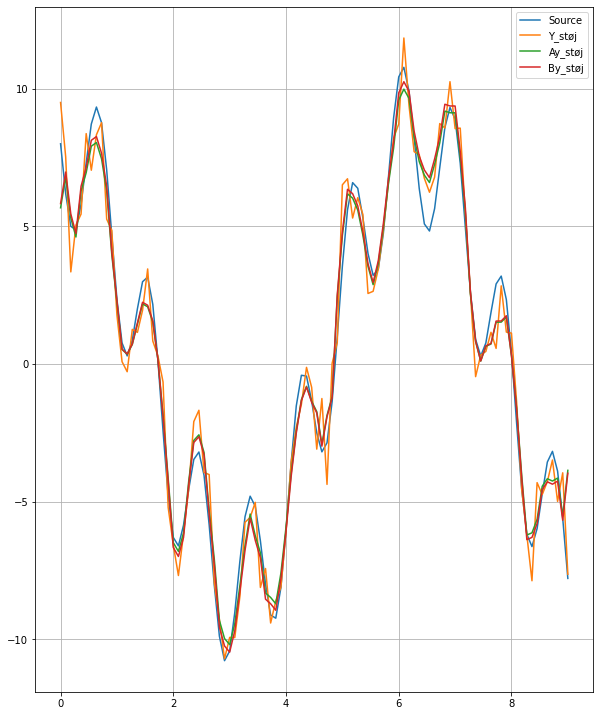

In [416]:
def optimizeB(toBeat):
    # Variable to store the optimal values for the optimization
    best = toBeat
    bestMultiplier = 1/3

    # Variable to specify to what precision, we want to search for a solution
    baseMultiplier = 0.001

    # Variable to store the 'optimal' amount of diagonals in the matrix, using the system specified for 'createSpecifiedDiagMatrix'-function
    diagCount = 1

    # Loops to iterative go through the options, and comparing them for the optimal solution
    for diagAmount in range(1, 15):
        for i in range(1, 3001):
            A = createSpecifiedDiagMatrix(n, diagAmount, 1 / (baseMultiplier*i))
            testAY = A @ y_støj
            res = absValues_vectorised(y, testAY).sum()
            if res < best:
                # Saving our best seen result
                best = res
                bestMultiplier = 1/(i*baseMultiplier)
                diagCount = diagAmount
    
    return best, bestMultiplier, diagCount

# Helper-function to present our result in a cleaner way. Returns the 'optimal' diagMatrix for use in plotting.
def printResult(toBeat, absDif, multiplier, diagCount):
    if absDif == toBeat:
        print("The matrix B could not be optimized enough to provide a better result")
    else: 
        print("Former best score: ", toBeat)
        print("Optimal B with ", absDif)
        b = createSpecifiedDiagMatrix(n, diagCount, multiplier)
        print(b)
        return b

# Search for a more optimal diagMatrix
bRes = optimizeB(y_Ay_comparison.sum())

B = printResult(y_Ay_comparison.sum(), bRes[0], bRes[1], bRes[2])

# Plot for visual comparison
plotMultiple([[x,y, "Source"], [x, y_støj, "Y_støj"], [x, Ay_støj, "Ay_støj"], [x, B @ y_støj, "By_støj"]], True)